In [21]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set()

We begin by reading the data and summarizing the variables.

In [22]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0702.csv'
df = pd.read_csv(path)
df.head()

,Time,pH
0,1,7.02
1,1,6.93
2,2,6.42
3,2,6.51
4,4,6.07


In [23]:
summary = df.describe()
summary

,Time,pH
count,10.000000,10.000000
mean,4.200000,6.120000
std,2.699794,0.583152
min,1.000000,5.360000
25%,2.000000,5.642500
50%,4.000000,6.030000
75%,6.000000,6.487500
max,8.000000,7.020000


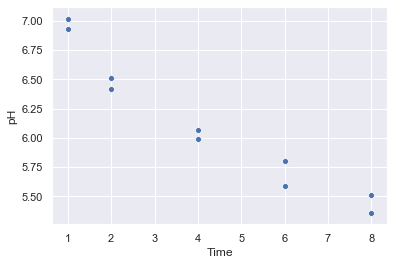

In [24]:
sns.scatterplot(x='Time', y='pH', data=df)

In [25]:
model = smf.ols('pH ~ Time', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           5.51e-06
Time:                        21:49:36   Log-Likelihood:                 5.2804
No. Observations:                  10   AIC:                            -6.561
Df Residuals:                       8   BIC:                            -5.956
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9965      0.097     72.199      0.000       6.773       7.220
Time          -0.2087      0.020    -10.594      0.000      -0.254      -0.163
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                0.943
Skew:                           0.270   Prob(JB):                        0.624
Kurtosis:                       1.596   Cond. No.                         9.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So not a very good fit.  

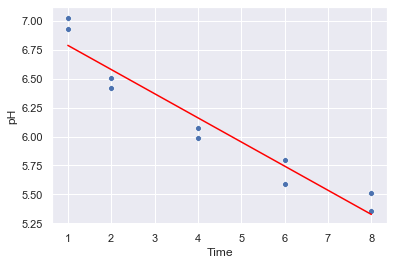

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(x='Time', y='pH', data=df, ax=ax)
pred = results.predict(df)
plt.plot(df.Time, pred, color='red')

In [27]:
model = smf.ols('pH ~ log(Time)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.70e-08
Time:                        21:49:39   Log-Likelihood:                 11.905
No. Observations:                  10   AIC:                            -19.81
Df Residuals:                       8   BIC:                            -19.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9836      0.049    143.897      0.000       6.872       7.096
log(Time)     -0.7257      0.034    -21.079      0.000      -0.805      -0.646
==============================================================================
Omnibus:                        0.820   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.588
Skew:                          -0.052   Prob(JB):                        0.745
Kurtosis:                       1.817   Cond. No.                         3.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

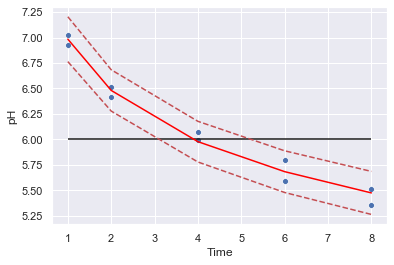

In [43]:
fig, ax = plt.subplots()
sns.scatterplot(x='Time', y='pH', data=df, ax=ax)
pred = results.predict(df)
prstd, iv_l, iv_u = wls_prediction_std(results)
ax.plot(df['Time'], iv_u, 'r--')
ax.plot(df['Time'], iv_l, 'r--')
plt.plot(df.Time, pred, color='red')
_ = ax.hlines(y=6, xmin=df.Time.min(), xmax=df.Time.max())

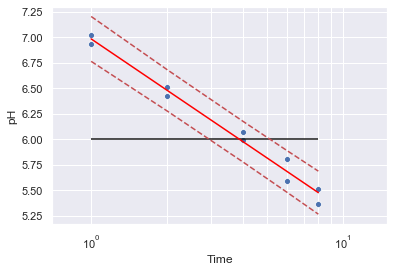

In [40]:
fig, ax = plt.subplots()
ax.set(xscale='log')
sns.scatterplot(x='Time', y='pH', data=df, ax=ax)
pred = results.predict(df)
prstd, iv_l, iv_u = wls_prediction_std(results)
ax.plot(df['Time'], iv_u, 'r--')
ax.plot(df['Time'], iv_l, 'r--')
plt.plot(df.Time, pred, color='red')
ax.set_xlim(0.7, 1.5e1)
h_xticks = ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.hlines(y=6, xmin=df.Time.min(), xmax=df.Time.max())